
https://machinelearningmastery.com/standard-machine-learning-datasets/

The Iris Flowers Dataset involves predicting the flower species given measurements of iris flowers.

It is a multi-class classification problem. The number of observations for each class is balanced. There are 150 observations with 4 input variables and 1 output variable. The variable names are as follows:

1. Sepal length in cm.
2. Sepal width in cm.
3. Petal length in cm.
4. Petal width in cm.
5. Class (Iris Setosa, Iris Versicolour, Iris Virginica).


In [1]:
#Loading libraries
library(rpart,quietly = TRUE)
library(rpart.plot,quietly = TRUE)
library(caret,quietly = TRUE)
library(rattle)

Loading required package: tibble

Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.4.0 Copyright (c) 2006-2020 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.



In [2]:
#find.package('caret')
#install.packages('rpart')
#install.packages("rpart.plot")
#install.packages('rattle')

In [3]:
#Reading the data set as a dataframe
df <- read.csv ("https://raw.githubusercontent.com/Ramesh-Bhutka/decision--tree/main/IRIS.csv")

In [4]:
str(df)

'data.frame':	150 obs. of  5 variables:
 $ sepal_length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ sepal_width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ petal_length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ petal_width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ species     : chr  "Iris-setosa" "Iris-setosa" "Iris-setosa" "Iris-setosa" ...


In [5]:
# number of rows with missing values
nrow(df) - sum(complete.cases(df))

[1] 0

In [6]:
#Converting the class variable into factor
df$species<-as.factor(df$species) 
df$species<-as.numeric(df$species)  
str(df)

'data.frame':	150 obs. of  5 variables:
 $ sepal_length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ sepal_width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ petal_length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ petal_width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ species     : num  1 1 1 1 1 1 1 1 1 1 ...


In [7]:
# analyzing the class  variable
table(df$species,df$species)

   
     1  2  3
  1 50  0  0
  2  0 50  0
  3  0  0 50

In [8]:
nrow(df)

[1] 150

In [9]:
#There are three level in the class variable, 1 as setosa and 2 as versicolor
#3 as Virginica
v<-df$species
table(v)

v
 1  2  3 
50 50 50 

In [10]:
#set seed to ensure reproducible results
set.seed(250)
#spliting into training and test data sets in 3:1 ratio
df[,'train'] <- ifelse(runif(nrow(df))<0.75,1,0)
#separate training and test sets
train_df <- df[df$train==1,]
test_df <- df[df$train==0,]
#get column index of train flag
df_trainColNum <- grep('train',names(train_df))
str(test_df)

'data.frame':	36 obs. of  6 variables:
 $ sepal_length: num  4.9 4.6 5 5.4 4.6 4.9 5.1 5 5.2 4.8 ...
 $ sepal_width : num  3 3.1 3.6 3.9 3.4 3.1 3.7 3 3.5 3.1 ...
 $ petal_length: num  1.4 1.5 1.4 1.7 1.4 1.5 1.5 1.6 1.5 1.6 ...
 $ petal_width : num  0.2 0.2 0.2 0.4 0.3 0.1 0.4 0.2 0.2 0.2 ...
 $ species     : num  1 1 1 1 1 1 1 1 1 1 ...
 $ train       : num  0 0 0 0 0 0 0 0 0 0 ...


In [11]:
number.perfect.splits <- apply(X=df[-1], MARGIN = 2, FUN = function(col){
t <- table(df$species,col)
sum(t == 0)
})

In [12]:
# Descending order of perfect splits
order <- order(number.perfect.splits,decreasing = TRUE)
number.perfect.splits <- number.perfect.splits[order]

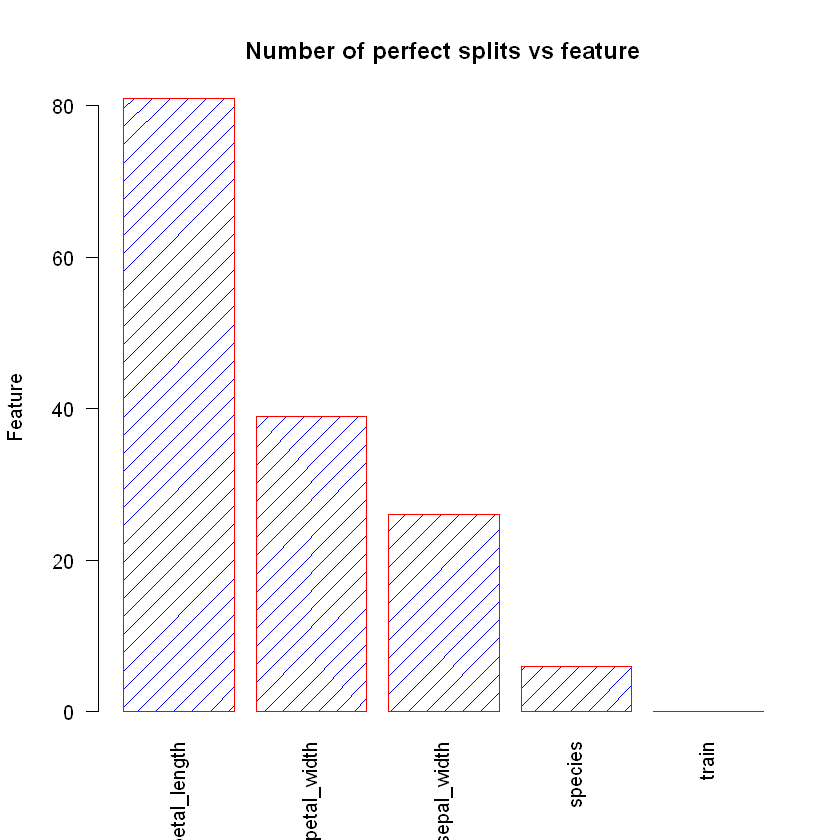

In [13]:
# Plot graph
#par(mar=c(10,2,2,2))
barplot(number.perfect.splits,main="Number of perfect splits vs feature",
xlab="",ylab="Feature",las=2,border="red",
col="blue",
density=10)

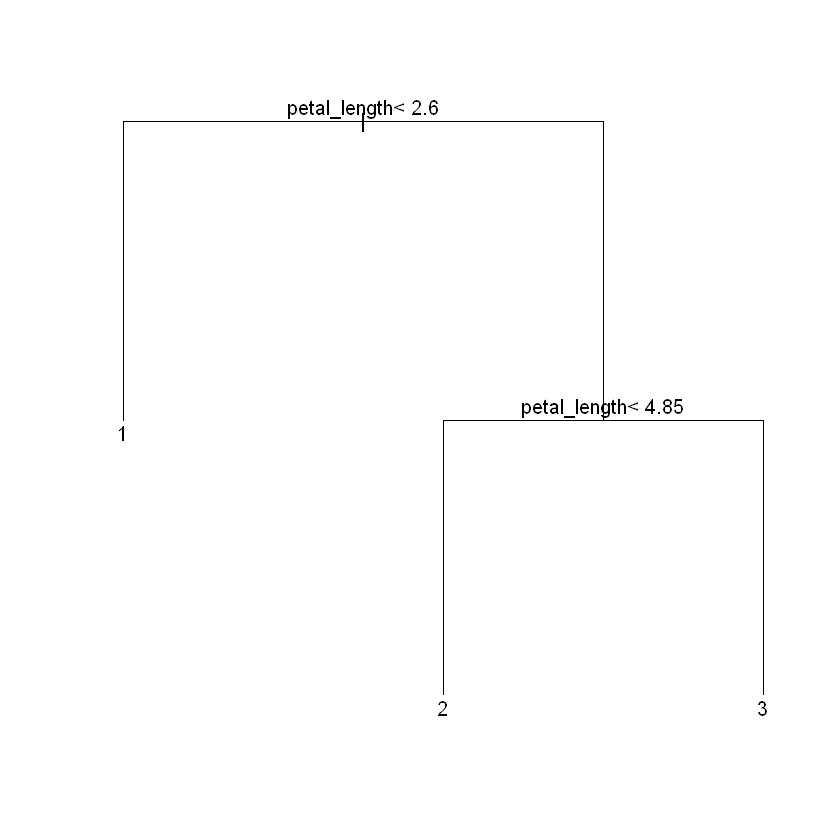

In [14]:
#Obtaining the train and test data set
#remove train flag column from train and test sets
train_df <- train_df[,-df_trainColNum]
test_df <- test_df[,-df_trainColNum]
#Get column index of predicted variable in dataset
typeColNum_df <- grep('species',names(df))
#Constructing the required Decision tree model
rpart_model_df <- rpart(species~.,data = train_df, method= 'class')
# Plotting the tree
plot(rpart_model_df)
text(rpart_model_df)

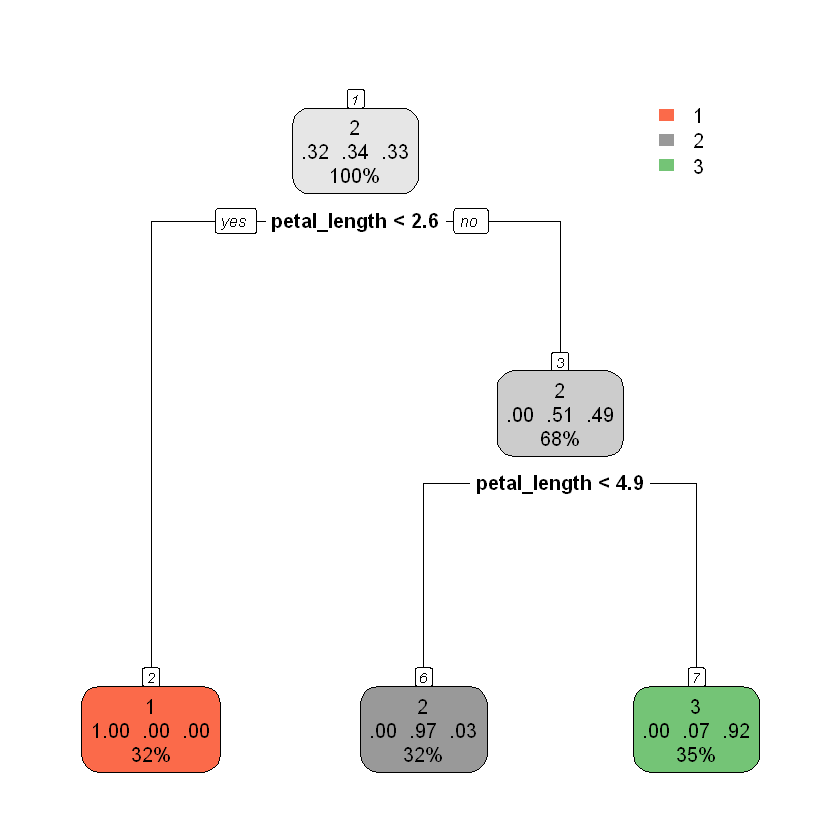

In [15]:
# Visualize the decision tree with rpart.plot
rpart.plot(rpart_model_df, nn=TRUE, cex=1, box.palette = "auto")

In [16]:
summary(rpart_model_df)

Call:
rpart(formula = species ~ ., data = train_df, method = "class")
  n= 114 

         CP nsplit  rel error    xerror       xstd
1 0.4933333      0 1.00000000 1.2133333 0.05713088
2 0.4533333      1 0.50666667 0.8533333 0.07064173
3 0.0100000      2 0.05333333 0.1066667 0.03636505

Variable importance
petal_length  petal_width sepal_length  sepal_width 
          33           30           23           13 

Node number 1: 114 observations,    complexity param=0.4933333
  predicted class=2  expected loss=0.6578947  P(node) =1
    class counts:    37    39    38
   probabilities: 0.325 0.342 0.333 
  left son=2 (37 obs) right son=3 (77 obs)
  Primary splits:
      petal_length < 2.6  to the left,  improve=37.48895, (0 missing)
      petal_width  < 0.8  to the left,  improve=37.48895, (0 missing)
      sepal_length < 5.45 to the left,  improve=24.13058, (0 missing)
      sepal_width  < 3.35 to the right, improve=14.87645, (0 missing)
  Surrogate splits:
      petal_width  < 0.8  to the 

In [17]:
#Checking how good the model is
rpart_predict_df<- predict(rpart_model_df,test_df[,-typeColNum_df],type='class')
mn_df <- mean(rpart_predict_df==test_df$species)
mn_df

[1] 0.9166667

In [18]:
# Constructing the confusion matrix to find out the efficiency of the model
table(pred=rpart_predict_df,true=test_df$species)

    true
pred  1  2  3
   1 13  0  0
   2  0 10  2
   3  0  1 10

In [20]:
# Constructing the confusion matrix to find out the efficiency of the model
t <- table(test_df$species,rpart_predict_df)

In [21]:
#install.packages('e1071', dependencies=TRUE)
confusionMatrix(t)

Confusion Matrix and Statistics

   rpart_predict_df
     1  2  3
  1 13  0  0
  2  0 10  1
  3  0  2 10

Overall Statistics
                                          
               Accuracy : 0.9167          
                 95% CI : (0.7753, 0.9825)
    No Information Rate : 0.3611          
    P-Value [Acc > NIR] : 4.942e-12       
                                          
                  Kappa : 0.8749          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            1.0000   0.8333   0.9091
Specificity            1.0000   0.9583   0.9200
Pos Pred Value         1.0000   0.9091   0.8333
Neg Pred Value         1.0000   0.9200   0.9583
Prevalence             0.3611   0.3333   0.3056
Detection Rate         0.3611   0.2778   0.2778
Detection Prevalence   0.3611   0.3056   0.3333
Balanced Accuracy      1.0000   0.8958   0.9145